In [1]:
from IPython.display import display, Image
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

### 词向量表示方法：

 #### One-Hot Repression
- 假设词典中不同词的数量为N，每个词可以和从0到N−1的连续整数一一对应。假设一个词的相应整数表示为i，为了得到该词的one-hot向量表示，我们创建一个全0的长为N的向量，并将其第i位设成1。即向量的长度为词典大小，假设词典包含300个词，可乐为[000100...]，1表示可乐在词典中的位置，其余都为0，七喜为[00000010...]。每个词在词典向量(300维)中只有一个为1，代表该词的词向量；
- 但这种方法有两个缺点。第一容易受维数灾难的困扰，比如当词典包含词有十几W个时。第二不能表示两个词之间的相似度，比如可乐和七喜存在相似性，但使用One-Hot Repression，则每个词向量两两正交的，余弦相似度为0。

 #### Distributed Representation
 - 直接用一个普通向量表示一个词，这种向量表示形式一般为: [0.56, -0.89, -0.123, ...]，维度以50维和100维比较常见；
 - 而怎么讲一个词表示成一种分布形式的向量，需要用到模型进行训练，word2vec是其中一种。
 - 通过训练得到的词向量一般是有空间上的意义，即将所有这些向量放在一起形成一个词向量空间，而每一向量则为该空间中的一个点，在这个空间上的词向量之间的距离度量也可以表示对应的两个词之间的"距离"。所谓两个词之间的"距离"，就是这两个词之间的语法，语义之间的相似性。每个词的词向量不同，并且相似的词，其词向量间的余弦相似度较大。

### 语言模型
给定一个T个词的字符串s，看它是自然语言的概率P(w1, w2, ..., wt)。w1到wt依次表示这句话中的各个词，即：$$p(w_{1},w_{2},...,w_{T}) = p(w_{1})p(w_{2}|w_{1})p(w_{3}|w_{1},w_{2})...p(w_{t}|w_{1},w_{2},...,w_{T-1})$$


以"大家喜欢吃苹果"为例，总共四个词"大家"，"喜欢"，"吃"，"苹果"，这句话为自然语言的概率是：
- p(大家，喜欢，吃，苹果)=p(大家)p(喜欢 | 大家)p(吃 | 大家，喜欢)p(苹果 | 大家，喜欢，吃);
- p(大家)表示"大家"这个词在语料库里面出现的概率；
- p(喜欢|大家)表示"喜欢"这个词出现在"大家"后面的概率;
- p(吃|大家，喜欢)表示"吃"这个词出现在"大家喜欢"后面的概率；
- p(苹果|大家,喜欢,吃)表示"苹果"这个词出现在"大家喜欢吃"后面的概率。
- 把这些概率连乘起来，得到的就是这句话平时出现的概率。

为了表示简单，将上面的公式表示为：$$p(s) = p(w_{1}, w_{2}, ..., w_{T})=\prod_{i=1}^{T}p(w_{i} | Context_{i})$$
其中Context(i)为空的话，就是它自己p(w)，另外如"吃"的Context就是"大家"、"喜欢"，以此类推。

### N-gram模型
上面的context是将这句话中这个词前面的所有词作为条件概率，N-gram是只考虑这个词前面的n-1个词，加上它自己，总共n个词，计算𝑝(𝑤𝑖 |𝐶𝑜𝑛𝑡𝑒𝑥𝑡𝑖)只考虑用这n个词来算，换成数学的公式来表示，就是: $$p(w_{i} | Context_{i}) = p(w_{i} | w_{i-n+1}, w_{i-n+2}, ..., w_{i-1})$$

实际中，n一般取2或3，即bigram和trigram，N-gram模型也会有些问题，如：
- n不能取太大，取大了语料库经常不足，所以基本是用降级的方法；
- 无法建模出词之间的相似度，就是有两个词经常出现在同一个context后面，但是模型是没法体现这个相似性的；
- 有些 n 元组（n 个词的组合，跟顺序有关的）在语料库里面没有出现过，对应出来的条件概率就是 0，这样一整句话的概率都是 0 了，这是不对的，解决的方法主要是两种：平滑法（基本上是分子分母都加一个数）和回退法（利用 n-1 的元组的概率去代替 n 元组的概率）

使用统计方法计算𝑝(𝑤𝑖 |𝐶𝑜𝑛𝑡𝑒𝑥𝑡𝑖)需要存储一个巨大的元组与概率的映射，这占用了极大的内存。而新方法是使用函数来拟合计算𝑝(𝑤𝑖 |𝐶𝑜𝑛𝑡𝑒𝑥𝑡𝑖)，换句话说𝑝(𝑤𝑖 |𝐶𝑜𝑛𝑡𝑒𝑥𝑡𝑖)不是各级语料库统计出来的，而是直接把context和wi代到一个函数里面计算出来的，数学表示: $$p(w_{i} | Context_{i}) = f(w_{i}, Context_{i}; \Theta )$$
word2vec就是其中一种

### 从霍夫曼树到条件概率的计算
word2vec计算𝑝(𝑤𝑖 |𝐶𝑜𝑛𝑡𝑒𝑥𝑡𝑖)这个条件概率的方法是利用神经网络的能量函数，因为在能量模型中，能量函数的功能是把神经网络的状态转为概率表示。能量模型有个特别大的好处，就是能拟合所有的指数族的分布。那么，如果认为这些条件概率是符合某个指数族的分布的话，是可以用能量模型去拟合的。总之 word2vec 就认为𝑝(𝑤𝑖 |𝐶𝑜𝑛𝑡𝑒𝑥𝑡𝑖)这个条件概率可以用能量模型来表示了。既然是能量模型，那么就需要能量函数，word2vec 定义了一个非常简单的能量函数: $$E(A, C)=-(A\cdot C)$$

其中 A 可以认为是某个词的词向量，C 是这个词的上下文的词向量的和（向量的和），基本上就可以认为 C 代表 Context；中间的点号表示两个向量的内积。然后根据能量模型（这个模型假设了温度一直是 1，所以能量函数没有分母了），就可以表示出词 A 的在上下文词向量 C 下的概率来了: $$p(A|C) = \frac{e^{-E(A,C)}}{\sum_{v=1}^{V}e^{-E(W_{v},C)}}$$

其中 V 表示语料库里面的的词的个数，这个定义的意思是在上下文 C 出现的情况下，中间这个词是 A 的概率，为了计算这个概率，肯定得把语料库里面所有的词的能量都算一次，然后再根据词 A 的能量，那个比值就是出现 A 的概率。这种计算概率的方式倒是能量模型里面特有的，这个定义在论文《Hierarchical Probabilistic Neural Network Language Model》里面，这里拿来改了个形式。

###  Continuous Bag-of-Word Model(连续词袋模型)
假设每个文本(context)只考虑一个词(word)，即给定一个context word，预测一个target word，就像bigram模型。词典(vocabulary)大小为V，隐藏层大小为N。如下图，网络为全连接层:

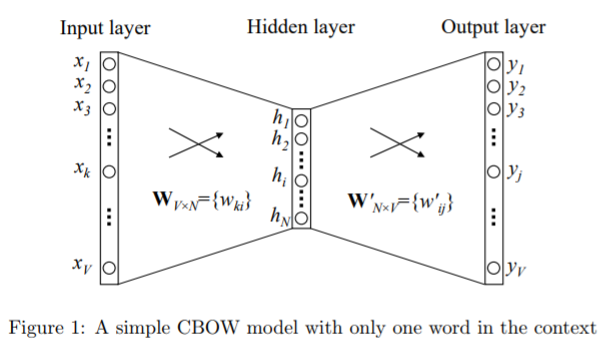

In [2]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/\
master/word2vec/Word2vec01.png')

输入是one-hot encode向量，表示在给定词典大小的V个单元中，{x1, ... , xv}，只有其中一个为1，其余为0，如雪糕为{000001000...}。图中W(V x N)表示输入层和隐藏层的权重，其大小为V x N。矩阵W的每行是输入层的相关词的N维向量表示v(w)。正式地说，W的第i行为v(w)的转置。给定一个文本context(word)，假设x(k)=1，x(k')=0，k != k'，即只有一个为1，其余k'为0：
$$assuming \ x_{k}=1 \ and \  x_{k'}=0 \ \ for \ k'\neq \ k \\
h = W^{T} x = W_{(k, \cdot)}^{T} := v_{w_{I}}^{T}$$

In [ ]:
这实质上是将权重W的第k行复制到隐藏层h，v(w(I))是输入单词w(I)的向量表示

### 跳字模型(skip-gram)

在跳字模型中，我们用一个词来预测它在文本序列周围的词。例如，给定文本序列"the", "man", "hit", "his", 和"son"，跳字模型所关心的是，给定"hit"，生成它邻近词"the", "man", "his", 和"son"的概率。在这个例子中，"hit"叫中心词，"the", "man", "his", 和"son"叫背景词。由于"hit"只生成与它距离不超过2的背景词，该时间窗口的大小为2。用词向量表示这个中心词以及背景词的向量表达，通过最大似然估计，找向量表达式来最大化似然估计，这样可以找到一套词向量的表达方法。

假设词典大小为$|\mathcal{V}|$，我们将词典中的每个词与从0到$|\mathcal{V}|-1$的整数一一对应：词典索引集$\mathcal{V} = {0, 1, \ldots, |\mathcal{V}|-1}$。一个词在该词典中所对应的整数称为词的索引。给定一个长度为$T$的文本序列中，$t$时刻的词为$w^{(t)}$。当时间窗口大小为$m$时，跳字模型需要最大化给定任一中心词生成背景词的概率：

$$ \prod_{t=1}^T \prod_{-m \leq j \leq m, j \neq 0} \mathbb{P}(w^{(t+j)} \mid w^{(t)})$$

上式中，$w^{(t)}$为t时刻的中心词，要生成$w^{(t+j)}$的背景词，j限制为[-m, m]之间，m为为窗口大小。假设m为2，则中心词$w^{(t)}$只计算生成前面两个词$w^{(t-1)}, w^{(t-2)}$和后面两个词$w^{(t+1)}, w^{(t+2)}$的概率。假设用中心词生成每个背景词的条件概率是相互独立的，则使用乘法连接。假设文本序列总长度有T个词，对每个中心词$w^{(t)} \ (t=1, ... t=T)$都进行计算背景词概率。即给定每个时刻中心词，生成该时刻背景词的联合概率。

最大化（联合概率）似然估计等价于最小化损失函数: 
$$max \ \prod_{t=1}^T \prod_{-m \leq j \leq m, j \neq 0} \mathbb{P}(w^{(t+j)} \mid w^{(t)}) \\
max \ \text{log}\prod_{t=1}^T \prod_{-m \leq j \leq m, j \neq 0} \mathbb{P}(w^{(t+j)} \mid w^{(t)})\\
max  \sum_{t=1}^T \sum_{-m \leq j \leq m, j \neq 0} \text{log} \mathbb{P}(w^{(t+j)} \mid w^{(t)})\\
min \ -\frac{1}{T} \sum_{t=1}^T \sum_{-m \leq j \leq m, j \neq 0} \text{log} \mathbb{P}(w^{(t+j)} \mid w^{(t)})$$

跳字模型的损失函数，找到一组中心词和背景词的向量表达式，来最小化损失函数：
$$ -\frac{1}{T} \sum_{t=1}^T \sum_{-m \leq j \leq m, j \neq 0} \text{log} \mathbb{P}(w^{(t+j)} \mid w^{(t)})$$

我们可以用$\mathbf{v}$和$\mathbf{u}$分别代表中心词和背景词的向量。换言之，对于词典中一个索引为$i$的词，它在作为中心词和背景词时的向量表示分别是$\mathbf{v}_i$和$\mathbf{u}_i$。而词典中所有词的这两种向量正是跳字模型所要学习的模型参数。为了将模型参数植入损失函数，我们需要使用模型参数表达损失函数中的中心词生成背景词的概率。假设中心词生成各个背景词的概率是相互独立的。给定中心词$w_c$在词典中索引为$c$，背景词$w_o$在词典中索引为$o$，损失函数中的中心词生成背景词的概率可以使用softmax函数定义为

$$\mathbb{P}(w_o \mid w_c) = \frac{\text{exp}(\mathbf{u}_o^\top \mathbf{v}_c)}{ \sum_{i \in \mathcal{V}} \text{exp}(\mathbf{u}_i^\top \mathbf{v}_c)}$$

当序列长度$T$较大时，我们通常随机采样一个较小的子序列来计算损失函数并使用随机梯度下降优化该损失函数。通过微分，我们可以计算出上式生成概率的对数关于中心词向量$\mathbf{v}_c$的梯度为：

$$\frac{\partial \text{log} \mathbb{P}(w_o \mid w_c)}{\partial \mathbf{v}_c}\\
=\frac{\partial (\text{log} \ (\text{exp}(\mathbf{u}_o^\top \mathbf{v}_c)) - \text{log} \ (\sum_{i \in \mathcal{V}} \text{exp}(\mathbf{u}_i^\top \mathbf{v}_c)))}{\partial \mathbf{v}_c}\\
=\frac{\partial (\mathbf{u}_o^\top \mathbf{v}_c- \text{log} \ (\sum_{i \in \mathcal{V}} \text{exp}(\mathbf{u}_i^\top \mathbf{v}_c)))}{\partial \mathbf{v}_c}\\
=\mathbf{u}_o - \frac{\partial (\text{log} \ (\sum_{i \in \mathcal{V}} \text{exp}(\mathbf{u}_i^\top \mathbf{v}_c)))}{\partial \mathbf{v}_c}\\
=\mathbf{u}_o - \frac{1}{\sum_{i \in \mathcal{V}} \text{exp}(\mathbf{u}_i^\top \mathbf{v}_c)}\frac{\partial \ (\sum_{i \in \mathcal{V}} \text{exp}(\mathbf{u}_i^\top \mathbf{v}_c))}{\partial \mathbf{v}_c}\\
=\mathbf{u}_o - \frac{1}{\sum_{i \in \mathcal{V}} \text{exp}(\mathbf{u}_i^\top \mathbf{v}_c)} \sum_{j \in \mathcal{V}} \text{exp}(\mathbf{u}_j^\top \mathbf{v}_c)\mathbf{u}_j\\
=\mathbf{u}_o - \sum_{j \in \mathcal{V}} \frac{\text{exp}(\mathbf{u}_j^\top \mathbf{v}_c)}{ \sum_{i \in \mathcal{V}} \text{exp}(\mathbf{u}_i^\top \mathbf{v}_c)} \mathbf{u}_j\\
$$

而上式与下式等价：

$$\frac{\partial \text{log} \mathbb{P}(w_o \mid w_c)}{\partial \mathbf{v}_c} = \mathbf{u}_o - \sum_{j \in \mathcal{V}} \mathbb{P}(w_j \mid w_c) \mathbf{u}_j$$

通过上面计算得到梯度后，我们可以使用随机梯度下降来不断迭代模型参数$\mathbf{v}_c$。其他模型参数$\mathbf{u}_o$的迭代方式同理可得。最终，对于词典中的任一索引为$i$的词，我们均得到该词作为中心词和背景词的两组词向量$\mathbf{v}_i$和$\mathbf{u}_i$。注意，单对$\frac{\partial \text{log} \mathbb{P}(w_o \mid w_c)}{\partial \mathbf{v}_c}$进行求导，就涉及整个词典 $\sum_{j \in \mathcal{V}} \mathbb{P}(w_j \mid w_c)$，公式涉及到求和，即需要将每个索引对应词的概率算一遍，其计算开销与词典大小相关。

参数更新：$V_{c} = V_{c} - \frac{\partial Loss}{\partial V_{c}}$

### 连续词袋模型
连续词袋模型与跳字模型类似。与跳字模型最大的不同是，连续词袋模型中用一个中心词在文本序列周围的词来预测该中心词。例如，给定文本序列"the", "man", "hit", "his", 和"son"，连续词袋模型所关心的是，邻近词“the”, "man", "his", 和"son"一起生成中心词"hit"的概率。

假设词典大小为$|\mathcal{V}|$，我们将词典中的每个词与从0到$|\mathcal{V}|-1$的整数一一对应：词典索引集$\mathcal{V} = {0, 1, \ldots, |\mathcal{V}|-1}$。一个词在该词典中所对应的整数称为词的索引。给定一个长度为$T$的文本序列中，$t$时刻的词为$w^{(t)}$。当时间窗口大小为$m$时，连续词袋模型需要最大化由背景词生成任一中心词的概率：

$$max \  \prod_{t=1}^T \mathbb{P}(w^{(t)} \mid w^{(t-m)}, \ldots, w^{(t-1)}, w^{(t+1)}, \ldots, w^{(t+m)})$$

上式的最大似然估计与最小化以下损失函数等价

$$min \  -\sum_{t=1}^T \text{log} \mathbb{P}(w^{(t)} \mid w^{(t-m)}, \ldots, w^{(t-1)}, w^{(t+1)}, \ldots, w^{(t+m)})$$

我们可以用$\mathbf{v}$和$\mathbf{u}$分别代表背景词和中心词的向量（注意符号和跳字模型中的不同）。换言之，对于词典中一个索引为$i$的词，它在作为背景词和中心词时的向量表示分别是$\mathbf{v}i$和$\mathbf{u}i$。而词典中所有词的这两种向量正是连续词袋模型所要学习的模型参数。为了将模型参数植入损失函数，我们需要使用模型参数表达损失函数中的中心词生成背景词的概率。给定中心词$w_c$在词典中索引为$c$，背景词$w{o_1}, \ldots, w{o_{2m}}$在词典中索引为$o_1, \ldots, o_{2m}$，损失函数中的背景词生成中心词的概率可以使用softmax函数定义为

$$\mathbb{P}(w_c \mid w_{o_1}, \ldots, w_{o_{2m}}) = \frac{\text{exp}[\mathbf{u}c^\top (\mathbf{v}{o_1} + \ldots + \mathbf{v}{o{2m}}) /(2m) ]}{ \sum_{i \in \mathcal{V}} \text{exp}[\mathbf{u}i^\top (\mathbf{v}{o_1} + \ldots + \mathbf{v}{o{2m}}) /(2m)]}$$


注意，背景词$\mathbf{v}{o_1} + \ldots + \mathbf{v}{o{2m}}$有多个向量，对其求平均，转化为单个向量，即背景词的平均向量。

当序列长度$T$较大时，我们通常随机采样一个较小的子序列来计算损失函数并使用随机梯度下降优化该损失函数。通过微分，我们可以计算出上式生成概率的对数关于任一背景词向量$\mathbf{v}_{o_i}$($i = 1, \ldots, 2m$)的梯度为：

$$\frac{\partial \text{log} \mathbb{P}(w_c \mid w_{o_1}, \ldots, w_{o_{2m}})}{\partial \mathbf{v}_{o_i}} = \frac{1}{2m}(\mathbf{u}c - \sum_{j \in \mathcal{V}} \frac{\text{exp}(\mathbf{u}_j^\top \mathbf{v}c)}{ \sum_{i \in \mathcal{V}} \text{exp}(\mathbf{u}_i^\top \mathbf{v}_c)} \mathbf{u}_j)$$

而上式与下式等价：

$$\frac{\partial \text{log} \mathbb{P}(w_c \mid w_{o_1}, \ldots, w_{o_{2m}})}{\partial \mathbf{v}_{o_i}} = \frac{1}{2m}(\mathbf{u}c - \sum_{j \in \mathcal{V}} \mathbb{P}(w_j \mid w_c) \mathbf{u}_j)$$

通过上面计算得到梯度后，我们可以使用随机梯度下降来不断迭代各个模型参数$\mathbf{v}_{o_i}$($i = 1, \ldots, 2m$)。其他模型参数$\mathbf{u}_c$的迭代方式同理可得。最终，对于词典中的任一索引为$i$的词，我们均得到该词作为背景词和中心词的两组词向量$\mathbf{v}_i$和$\mathbf{u}_i$。

### 近似训练法
我们可以看到，无论是跳字模型还是连续词袋模型，每一步梯度计算的开销与词典$\mathcal{V}$的大小相关。因为分母为softmax，计算遍历全部词典。显然，当词典较大时，例如几十万到上百万，这种训练方法的计算开销会较大。所以，使用上述训练方法在实践中是有难度的。

我们将使用近似的方法来计算这些梯度，从而减小计算开销。常用的近似训练法包括负采样和层序softmax。

### 负采样
我们以跳字模型为例讨论负采样。

词典$\mathcal{V}$大小之所以会在目标函数中出现，是因为中心词$w_c$生成背景词$w_o$的概率$\mathbb{P}(w_o \mid w_c)$使用了softmax，而softmax正是考虑了背景词可能是词典中的任一词，并体现在softmax的分母上。

我们不妨换个角度，假设中心词$w_c$生成背景词$w_o$由以下相互独立事件联合组成来近似

- 中心词$w_c$和背景词$w_o$同时出现在该训练数据窗口
- 中心词$w_c$和第1个噪声词$w_1$不同时出现在该训练数据窗口（噪声词$w_1$按噪声词分布$\mathbb{P}(w)$随机生成，假设一定和$w_c$不同时出现在该训练数据窗口）
- ...
- 中心词$w_c$和第$K$个噪声词$w_K$不同时出现在该训练数据窗口（噪声词$w_K$按噪声词分布$\mathbb{P}(w)$随机生成，假设一定和$w_c$不同时出现在该训练数据窗口）

我们可以使用$\sigma(x) = 1/(1+\text{exp}(-x))$函数来表达中心词$w_c$和背景词$w_o$同时出现在该训练数据窗口的概率，这里以跳字模型为例，其中$\mathbf{v}_c$为中心词,$\mathbf{u}_o$为背景词：
$$\mathbb{P}(D = 1 \mid w_o, w_c) = \sigma(\mathbf{u}_o^\top \mathbf{v}_c)$$

那么，中心词$w_c$生成背景词$w_o$的对数的联合概率可以近似为中心词和背景词同时出现的概率$\mathbb{P}(D = 1 \mid w_o, w_c)$乘以中心词$w_c$和噪声词$w_k$没有出现在当前训练数据集当前时间窗口的概率$\mathbb{P}(D = 0)$，总共有K个噪声词：

$$ \text{log} \mathbb{P} (w_o \mid w_c) = \text{log} [\mathbb{P}(D = 1 \mid w_o, w_c) \prod_{k=1, w_k \sim \mathbb{P}(w)}^K \mathbb{P}(D = 0 \mid w_k, w_c) ]$$



假设噪声词$w_k$在词典中的索引为$i_k$，上式可改写为

$$ \text{log} \mathbb{P} (w_o \mid w_c) = \text{log} \frac{1}{1+\text{exp}(-\mathbf{u}o^\top \mathbf{v}c)} + \sum{k=1, w_k \sim \mathbb{P}(w)}^K \text{log} [1-\frac{1}{1+\text{exp}(-\mathbf{u}{i_k}^\top \mathbf{v}_c)}] $$

因此，有关中心词$w_c$生成背景词$w_o$的损失函数是

$$ - \text{log} \mathbb{P} (w_o \mid w_c) = -\text{log} \frac{1}{1+\text{exp}(-\mathbf{u}o^\top \mathbf{v}c)} - \sum{k=1, w_k \sim \mathbb{P}(w)}^K \text{log} \frac{1}{1+\text{exp}(\mathbf{u}{i_k}^\top \mathbf{v}_c)} $$

当我们把$K$取较小值时，每次随机梯度下降的梯度计算开销将由$\mathcal{O}(|\mathcal{V}|)$降为$\mathcal{O}(K)$。

我们也可以对连续词袋模型进行负采样。有关背景词$w^{(t-m)}, \ldots, w^{(t-1)}, w^{(t+1)}, \ldots, w^{(t+m)}$生成中心词$w_c$的损失函数

$$-\text{log} \mathbb{P}(w^{(t)} \mid w^{(t-m)}, \ldots, w^{(t-1)}, w^{(t+1)}, \ldots, w^{(t+m)})$$

在负采样中可以近似为

$$-\text{log} \frac{1}{1+\text{exp}[-\mathbf{u}c^\top (\mathbf{v}{o_1} + \ldots + \mathbf{v}{o{2m}}) /(2m)]} - \sum_{k=1, w_k \sim \mathbb{P}(w)}^K \text{log} \frac{1}{1+\text{exp}[(\mathbf{u}{i_k}^\top (\mathbf{v}{o_1} + \ldots + \mathbf{v}{o{2m}}) /(2m)]}$$

同样地，当我们把$K$取较小值时，每次随机梯度下降的梯度计算开销将由$\mathcal{O}(|\mathcal{V}|)$降为$\mathcal{O}(K)$。